In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite as hermite

Stationary state energy nr.0 : 0.9298697994724288
Stationary state energy nr.1 : 2.6867182456782017
Stationary state energy nr.2 : 3.707266642561861
Stationary state energy nr.3 : 6.112994698445159
Stationary state energy nr.4 : 6.162441147432822
Stationary state energy nr.5 : 11.057285446300563
Stationary state energy nr.6 : 11.057420722949932
Stationary state energy nr.7 : 18.03157842788734
Stationary state energy nr.8 : 18.031578505852917


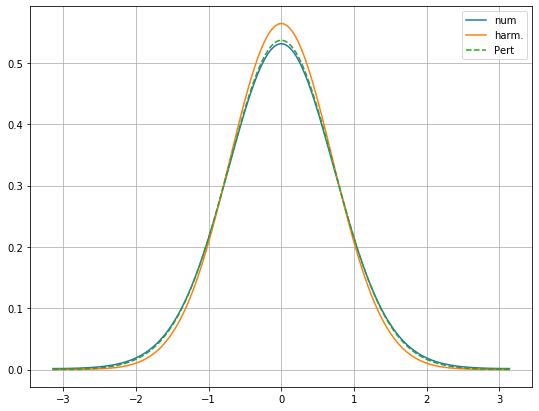

In [6]:
M = 1
omega = 1
h_bar = 1

def numeric_sol(M,omega,h_bar=1,N=2000,print_energies=False):
    "Numerical methd from Griffiths exercise 2.61"
    d_phi = 2*np.pi/N
    lambd = h_bar**2/(2*M*d_phi**2)
    phi_list = np.array([i*d_phi-np.pi for i in range(N)])
    v_i = [M*omega**2*(1-np.cos(phi))/lambd for phi in phi_list]
    
    H = np.zeros((N,N))
    
    ## Loop that creates H-matrix ##
    for i, row in enumerate(H):
        row[i-1] =-1
        row[i] = 2+v_i[i]
        if i+1 >= N:
            row[0] = -1
        else:
            row[i+1] = -1
    H = lambd*H
    
    E,psi = np.linalg.eigh(H) ## Finding eigenvalues and eigenvectors of an Hermitian matrix
    
    return E,psi,phi_list

def normalize(psi, phi_list):
    "Normalizes the given wave-function over the given interval"
    return psi*1/np.sqrt(np.trapz(psi**2,phi_list))

def harmonic_oscillator(M,omega,n,phi_list,h_bar=1):
    "Returns the n-th stationary wave-function og the harmonic oscillator - 2.86 in Griffiths"
    xi = np.sqrt(M*omega/h_bar)*phi_list
    konst = (M*omega/(np.pi*h_bar))**(1/4)*1/np.sqrt(2**n*np.math.factorial(n))
    return konst*hermite(n,xi)*np.exp(-xi**2/2)

def psi0_pertubation(M,omega,phi_list,h_bar=1):
    phi_extend = np.hstack((phi_list,(phi_list+2*np.pi)[1:]))
    phi_extend = np.hstack(((phi_list-2*np.pi)[:-1],phi_extend)) #Expanding interval to normalze well
    psi2_harmonic = harmonic_oscillator(M,omega,2,phi_extend,h_bar=h_bar)
    psi4_harmonic = harmonic_oscillator(M,omega,4,phi_extend,h_bar=h_bar)
    psi0_harmonic = harmonic_oscillator(M,omega,0,phi_extend,h_bar=h_bar)
    psi_pert = psi0_harmonic + h_bar/(96*M*omega)*(3*np.sqrt(2)*psi2_harmonic+np.sqrt(3/2)*psi4_harmonic)
    psi_pert *= 1/np.sqrt(np.trapz(psi_pert**2,phi_extend)) # Find the pertubation and normalize
    return psi_pert[len(phi_list)-1:len(phi_list)*2-1] ## only return the values from -pi to pi

E_num, psi_num, phi_list = numeric_sol(M,omega) # get the numerical solutions
psi_pert = psi0_pertubation(M,omega,phi_list) ## calculate the pertubation

for i in range(9):
    print(f'Stationary state energy nr.{i} : {E_num[i]*2*M/h_bar**2}') #Factor makes the energy unitless like in baker

#Plotting the Ground state!
target = normalize(psi_num[:,0],phi_list)
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(phi_list,target**2,label='num')
ax.plot(phi_list,harmonic_oscillator(M,omega,0,phi_list)**2,label = 'harm.')
ax.plot(phi_list,psi_pert**2,label='Pert', ls = '--')
ax.legend(), ax.grid()
plt.show()